<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/gender_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [18]:
import pandas as pd
import re
import gdown

google_drive_link = "https://drive.google.com/file/d/1wfpbNWY4S39u5GuNxBr218N_gyXmCEUv/view?usp=drive_link"
file_id = re.search(r"/d/(\w+)/", google_drive_link).group(1)

output_file = 'genderPrediction.csv'

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1wfpbNWY4S39u5GuNxBr218N_gyXmCEUv
From (redirected): https://drive.google.com/uc?id=1wfpbNWY4S39u5GuNxBr218N_gyXmCEUv&confirm=t&uuid=e6f2a768-d4b6-420f-883b-12af60690170
To: /content/genderPrediction.csv
100%|██████████| 200M/200M [00:01<00:00, 147MB/s]


'genderPrediction.csv'

In [19]:
data = pd.read_csv(output_file)
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [21]:
data['gender'].value_counts()

,count
gender,
0,12391
1,11314


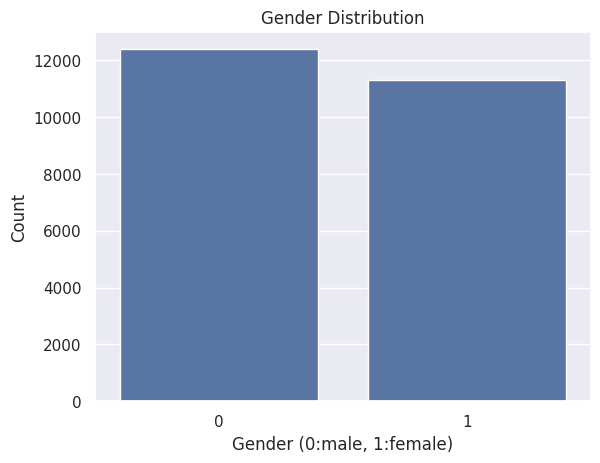

In [22]:
#make bar plot about gender,
sns.countplot(x='gender', data=data)
plt.xlabel('Gender (0:male, 1:female)')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


# Formating Data

In [23]:
import numpy as np
data['pixels'] = data['pixels'].map(lambda x: numpy.array(x.split(' '), dtype=np.float32).reshape(48,48))

In [24]:
images = np.array(data['pixels'].to_list())

In [25]:
labels = data['gender'].values